# 2. Aplicar models

### CNN

In [20]:
import sys
sys.path.insert(0,'C:\\Users\\moasi\\Downloads\\kaggle')

from src import funcionshow
from src import librerias
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,MaxPool2D, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam
from sklearn.model_selection import KFold
from keras.utils import to_categorical

In [2]:
labels,imlabels,imnames,numim,numlab=librerias.crear_labels('../data/dataset/train/')
# Define the model architecture , (64, 240, 240, 3)shape dataset

model = tf.keras.Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [3]:
#Creating Batch size and Image shape
BATCH_SIZE=32
IMG_SHAPE=(224,224)
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [7]:
#Defining Train, Test and Validation data
train_dataset = train_datagen.flow_from_directory(batch_size=32,directory='../data/dataset/test',shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="training",class_mode='categorical')

val_dataset = train_datagen.flow_from_directory(batch_size=32,directory='../data/dataset/test',shuffle=True,classes=labels,target_size=IMG_SHAPE, subset="validation",class_mode='categorical')

test_data = test_datagen.flow_from_directory('../data/dataset/train', batch_size=32, target_size=IMG_SHAPE, shuffle = False, classes=labels, class_mode='categorical')

Found 2430 images belonging to 6 classes.
Found 268 images belonging to 6 classes.
Found 10901 images belonging to 6 classes.


Anire provant diferents valors de epoques per tal de veure si varia el resultat en la prediccio

In [5]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics="accuracy")
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset)

Epoch 1/5
76/76 [==============================] - 87s 1s/step - loss: 0.4643 - accuracy: 0.4053 - val_loss: 0.3068 - val_accuracy: 0.6455
Epoch 2/5
76/76 [==============================] - 77s 1s/step - loss: 0.2183 - accuracy: 0.7383 - val_loss: 0.2044 - val_accuracy: 0.7910
Epoch 3/5
76/76 [==============================] - 95s 1s/step - loss: 0.1522 - accuracy: 0.8284 - val_loss: 0.1510 - val_accuracy: 0.8470
Epoch 4/5
76/76 [==============================] - 79s 1s/step - loss: 0.1151 - accuracy: 0.8765 - val_loss: 0.1324 - val_accuracy: 0.8582
Epoch 5/5
76/76 [==============================] - 80s 1s/step - loss: 0.0939 - accuracy: 0.9016 - val_loss: 0.1198 - val_accuracy: 0.8806


In [8]:
loss, acc = model.evaluate(test_data)
print('accuracy: ',acc)
print('loss: ',loss)

341/341 [==============================] - 67s 195ms/step - loss: 0.1255 - accuracy: 0.8578
accuracy:  0.8578112125396729
loss:  0.1254992038011551


Creare un graf per tal de poder veure mes visualment els resultats a traves de les diferents epoques el CNN

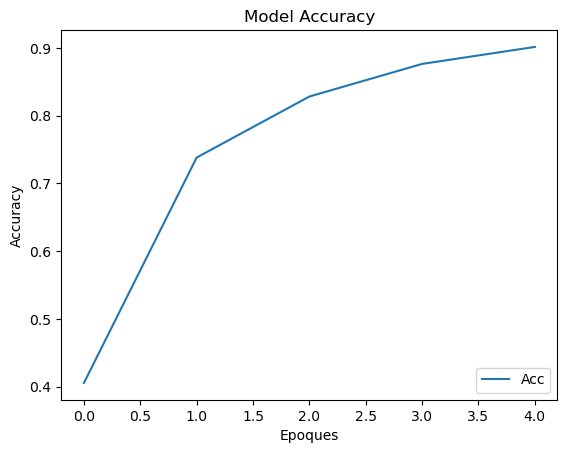

In [11]:
plt.plot(history.history['accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoques')
plt.ylabel('Accuracy')
plt.legend(['Acc'], loc = 'lower right')

veiem que a mesura que pasen les epoques ens apropem al 100% d'accuracy pero provant amb mes nombre d'epoques no creix molt l'accuracy per lo que podria afirmar que un nmero molt alt nomres produiria un gran consum de temps d'execució i no val la pena per lo poc que millora el resultat

Fare una matriu de confusio per tal de veure com estan repartits el resultats de la prediccio

In [18]:
predictions = model.predict(test_data)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())


341/341 [==============================] - 70s 203ms/step


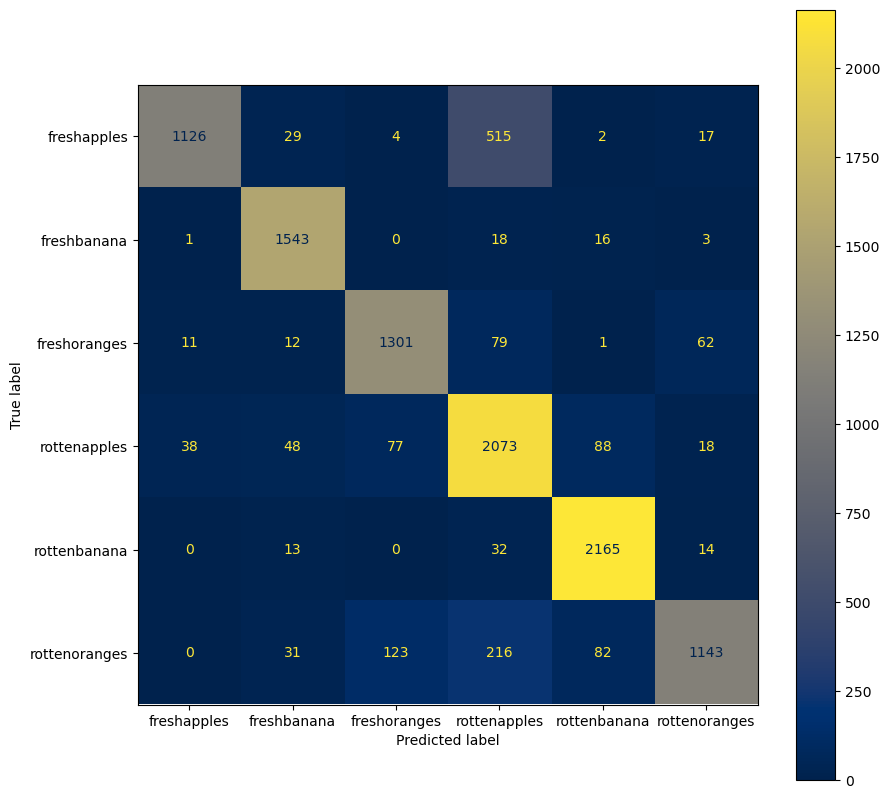

In [21]:
cm = confusion_matrix(test_data.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")

veiem que la majoria d'errors es troben en confondre la fruita rotten i fresh i casi no hi han errors en confondre la fruita que apareix en l'imatge encara que amb las taronjes i les pomes si trobem mes errors de lo habitual probablement per la forma que tenen les dues fruites